<a href="https://colab.research.google.com/github/christina3099/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Overview

This notebook presents an end-to-end approach to sentiment analysis on movie reviews, transforming raw text into actionable insights. We experiment with multiple text vectorization techniques and deep learning architectures to identify the most effective model for classifying reviews as positive or negative.

##Key highlights:

* Text preprocessing and exploratory analysis of sentiment distribution

* Comparison of vectorization methods: One-Hot, TF-IDF, Embeddings, and Pretrained Models

* Implementation of multiple models: Logistic Regression, RNNs, LSTMs, GRUs, CNNs, and Transformers

* Trade-off analysis of accuracy, interpretability, and computational efficiency

* Final deployment-ready model with clear performance evaluation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'imdb-dataset-of-50k-movie-reviews' dataset.
Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


#1. Data Loading and Exploration

In [17]:
movies = pd.read_csv(path +'/IMDB Dataset.csv')

In [18]:
movies.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [19]:
movies['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [10]:
print('Size of the dataset : ',movies.shape)
print('Class distribution: ', movies['sentiment'].value_counts())
if (movies['sentiment'].value_counts()[0]/movies['sentiment'].value_counts()[1]) > 1:
  print('Imbalanced dataset')
else:
  print('Balanced dataset')

Size of the dataset :  (50000, 2)
Class distribution:  sentiment
positive    25000
negative    25000
Name: count, dtype: int64
Balanced dataset


#2. Exploratory Data Analysis

##2.1 Target Variable Distribution

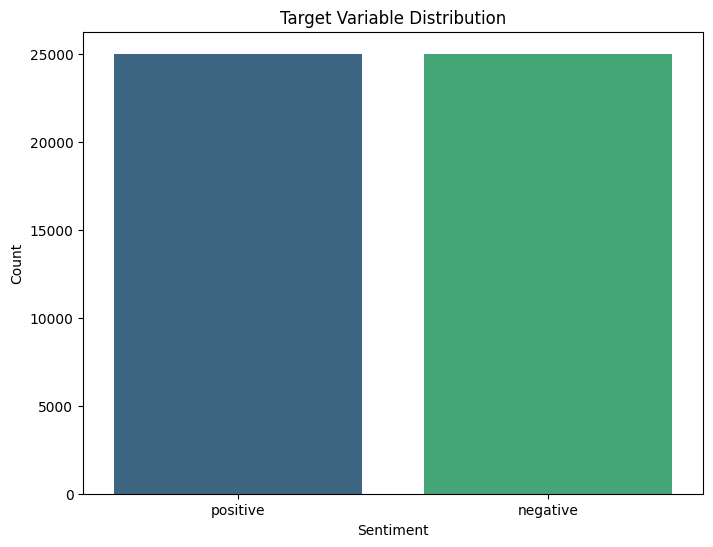

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=movies, palette = 'viridis')
plt.title('Target Variable Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

##2.2 Data Preprocessing

In [27]:
import nltk
from nltk.tokenize import sent_tokenize

# nltk.download('punkt') # Download necessary NLTK data for tokenization

In [23]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [36]:
movies['tokenized_review'] = movies['review'].apply(nltk.sent_tokenize)

In [37]:
movies.head(5)

,review,sentiment,tokenized_review
0,One of the other reviewers has mentioned that ...,positive,[One of the other reviewers has mentioned that...
1,A wonderful little production. <br /><br />The...,positive,"[A wonderful little production., <br /><br />T..."
2,I thought this was a wonderful way to spend ti...,positive,[I thought this was a wonderful way to spend t...
3,Basically there's a family where a little boy ...,negative,[Basically there's a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[Petter Mattei's ""Love in the Time of Money"" i..."


In [47]:
import re

def clean_text(text_list):
    cleaned_list = []
    for text in text_list:
        if isinstance(text, str):
            text = text.lower()
            text = re.sub(r"\W", " ", text) # Remove non-alphanumeric characters
            text = re.sub(r"\s+", " ", text) # Replace multiple spaces with a single space
            text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URLs
            cleaned_list.append(text.strip()) # Remove leading/trailing whitespace
        else:
            cleaned_list.append(text) # If not string, append as-is
    return cleaned_list

movies['tags'] = movies['tokenized_review'].apply(clean_text)

In [49]:
movies.head(5)

,review,sentiment,tokenized_review,tags
0,One of the other reviewers has mentioned that ...,positive,[One of the other reviewers has mentioned that...,[one of the other reviewers has mentioned that...
1,A wonderful little production. <br /><br />The...,positive,"[A wonderful little production., <br /><br />T...","[a wonderful little production, br br the film..."
2,I thought this was a wonderful way to spend ti...,positive,[I thought this was a wonderful way to spend t...,[i thought this was a wonderful way to spend t...
3,Basically there's a family where a little boy ...,negative,[Basically there's a family where a little boy...,[basically there s a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[Petter Mattei's ""Love in the Time of Money"" i...",[petter mattei s love in the time of money is ...


In [48]:
movies['tags'][0]

['one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked',
 'they are right as this is exactly what happened with me br br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go',
 'trust me this is not a show for the faint hearted or timid',
 'this show pulls no punches with regards to drugs sex or violence',
 'its is hardcore in the classic use of the word br br it is called oz as that is the nickname given to the oswald maximum security state penitentary',
 'it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda',
 'em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away br br i would say the main appeal of the show is due to the fact that it goes wh